<a href="https://colab.research.google.com/github/brotheramin/MachineLearning/blob/main/SepsisMiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# data manipulation libraries
import numpy as np # linear algebra
import pandas as pd # data processing

# data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# machine learning methods
from sklearn.model_selection import train_test_split # data splitting into train and test
from sklearn.preprocessing import FunctionTransformer


from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score

In [38]:
df = pd.read_csv('feature_combined.csv')

In [ ]:
df.head().T

,0,1,2,3,4
X_0,1.500000,2.227147,4.000000,0.000000,4.000000
X_1,140.000000,140.000000,140.000000,138.000000,140.000000
X_2,138.000000,138.250000,138.500000,138.000000,138.500000
X_3,137.000000,137.000000,138.000000,138.000000,138.000000
X_4,1.414214,1.129338,2.000000,0.000000,2.000000
...,...,...,...,...,...
X_103,0.015385,0.006593,-0.001099,-0.027473,-0.037363
X_104,0.650444,0.650444,0.776250,1.235168,1.281025
offset,-660.000000,-655.000000,-650.000000,-645.000000,-640.000000
id,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79800 entries, 0 to 79799
Columns: 108 entries, X_0 to label
dtypes: float64(93), int64(15)
memory usage: 65.8 MB


In [ ]:
df.nunique()

X_0       1372
X_1        137
X_2        513
X_3        135
X_4       1841
          ... 
X_103     1147
X_104     4182
offset     133
id         600
label        2
Length: 108, dtype: int64

In [ ]:
df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
X_0,79800.0,0.155129,3.047073,-6.000000,-1.289256,0.00000,2.602498,4.000000
X_1,79800.0,89.397506,20.258613,0.000000,75.000000,88.00000,102.000000,177.000000
X_2,79800.0,87.264355,19.951703,0.000000,72.750000,85.50000,99.750000,177.000000
X_3,79800.0,85.344023,19.978456,0.000000,71.000000,84.00000,98.000000,177.000000
X_4,79800.0,0.145070,1.102048,-2.000000,-0.228728,0.00000,0.854563,2.000000
...,...,...,...,...,...,...,...,...
X_103,79800.0,0.000516,0.100430,-2.241758,-0.029670,0.00000,0.030769,2.209890
X_104,79800.0,2.405792,2.542446,0.000000,1.068188,1.83275,3.004270,50.647474
offset,79800.0,-330.000000,191.964741,-660.000000,-495.000000,-330.00000,-165.000000,0.000000
id,79800.0,300.500000,173.205925,1.000000,150.750000,300.50000,450.250000,600.000000


In [ ]:
df["label"].value_counts()

1    39900
0    39900
Name: label, dtype: int64

In [ ]:
# Create (X_train, y_train), (X_test, y_test)

as_np = df.to_numpy()

index = int(len(as_np) * .80)

X_train, y_train = as_np[:index, :-1], as_np[:index, -1]
X_test, y_test = as_np[index:, :-1], as_np[index:, -1]

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((63840, 107), (63840,)), ((15960, 107), (15960,)))

In [ ]:
df1 = df.loc[df['offset'] == 0]

In [ ]:
df1.head()

,X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_98,X_99,X_100,X_101,X_102,X_103,X_104,offset,id,label
132,-1.200000,127,125.50,124,0.000000,0.20,1.290994,-0.056816,127,124.857143,...,1.772306,19,16.923077,16,1.085143,0.028571,0.862316,0,1,1
265,4.000000,86,85.25,85,2.000000,-0.02,0.500000,-1.317901,90,86.857143,...,-0.707671,20,15.846154,13,0.634795,-0.054945,2.409915,0,2,1
398,4.000000,106,105.25,105,2.000000,0.02,0.500000,3.000000,106,105.000000,...,0.060937,32,30.307692,28,-0.722135,0.012088,1.109400,0,3,1
531,-3.109816,105,98.75,94,0.456508,-0.14,5.188127,-0.077303,105,96.285714,...,-1.039498,21,16.615385,14,0.449215,0.078022,2.433737,0,4,1
664,0.000000,77,77.00,77,0.000000,0.00,0.000000,7.000000,77,76.857143,...,1.798440,23,16.076923,11,0.845429,-0.015385,2.985005,0,5,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 132 to 79799
Columns: 108 entries, X_0 to label
dtypes: float64(93), int64(15)
memory usage: 510.9 KB


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop("label", axis=1), df1["label"], test_size=0.2, random_state=42)

**Logestic Regression**

In [ ]:
model = LogisticRegression().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

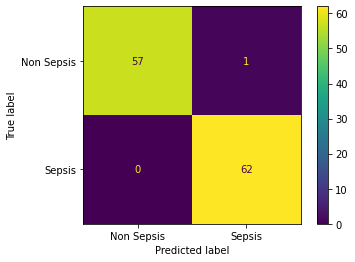

In [ ]:
# Display Confusion Matrix

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Non Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
# Get TNs, FPs, FNs, TPs

tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 57
False Positives: 1
False Negatives: 0
True Positives: 62



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9916666666666667'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 1.0'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.0'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 0.9827586206896551'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.017241379310344827'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 1.0'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.9841269841269841'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 0.9913793103448276'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.9919999999999999'

In [ ]:
# Get prediction probabilities

probabilities = model.predict_proba(X_test)[:, 1]

probabilities

array([1. , 0. , 0. , 1. , 1. , 0.6, 1. , 0. , 1. , 0. , 1. , 1. , 1. ,
       0. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 0. , 0. , 0. , 0. , 0. ,
       1. , 1. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 1. , 0. , 0. ,
       0.8, 0. , 1. , 0. , 0. , 1. , 1. , 0. , 1. , 1. , 0. , 1. , 1. ,
       1. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 1. , 1. , 0.2, 0. , 0. ,
       1. , 0. , 0. , 1. , 0.4, 0.2, 1. , 0. , 0. , 0. , 0. , 0.2, 1. ,
       0. , 0. , 1. , 0. , 0. , 0. , 1. , 1. , 1. , 1. , 0. , 1. , 1. ,
       0. , 1. , 0.6, 1. , 1. , 1. , 1. , 0. , 1. , 1. , 1. , 0. , 0. ,
       1. , 0. , 1. , 0.8, 1. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. ,
       1. , 0. , 0. ])

In [ ]:
# Get predictions using normal threshold of 0.5

pd.value_counts(probabilities > 0.5)

True     63
False    57
dtype: int64

In [ ]:
# Generate 2000 evenly-separated thresholds

import numpy as np

thresholds = np.linspace(0, 1, num=2000).astype(np.float16)

thresholds

array([0.000e+00, 5.002e-04, 1.000e-03, ..., 9.990e-01, 9.995e-01,
       1.000e+00], dtype=float16)

In [ ]:
# Get test predictions array for each threshold

all_predictions = np.array([(probabilities > t).astype(int) for t in thresholds])

all_predictions.shape

(2000, 120)

In [ ]:
# Show distribution depending on threshold

pd.value_counts(all_predictions[0])

1    67
0    53
dtype: int64

In [ ]:
# Get confusion matrices, true positive rates, and false positive rates for each threshold

confusion_matrices = [confusion_matrix(y_test, predictions) for predictions in all_predictions]
tn_fp_fn_tps = [cm.ravel() for cm in confusion_matrices]

tprs = [tpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]
fprs = [fpr(tn, fp, fn, tp) for tn, fp, fn, tp in tn_fp_fn_tps]

In [ ]:
# Create Scatter Plot of ROC Curve

import plotly.express as px

px.scatter(x=fprs, y=tprs, color=thresholds, labels=dict(x='False Positive Rate', y='True Positive Rate', color='Threshold'), title='ROC Curve')

**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

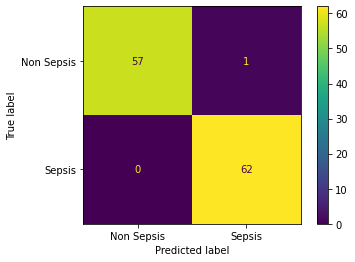

In [ ]:
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Non Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 57
False Positives: 1
False Negatives: 0
True Positives: 62



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9916666666666667'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 1.0'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.0'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 0.9827586206896551'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.017241379310344827'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 1.0'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.9841269841269841'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 0.9913793103448276'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.9919999999999999'

**Random Forest**

In [ ]:
model = RandomForestClassifier().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

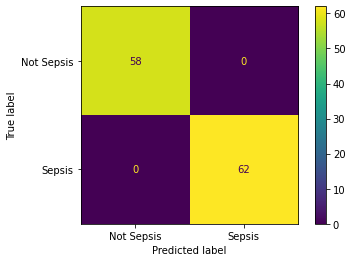

In [ ]:
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Not Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 58
False Positives: 0
False Negatives: 0
True Positives: 62



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 1.0'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 1.0'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.0'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 1.0'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.0'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 1.0'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 1.0'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 1.0'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 1.0'

**MLP**

In [ ]:
model = MLPClassifier().fit(X_train, y_train)
test_predictions = model.predict(X_test)
test_predictions

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

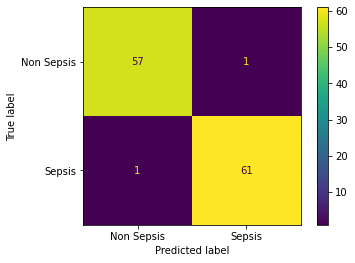

In [ ]:
cm = confusion_matrix(y_test, test_predictions, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=['Non Sepsis', 'Sepsis'])
disp.plot()

In [ ]:
tn, fp, fn, tp = cm.ravel()

s = """
True Negatives: {0}
False Positives: {1}
False Negatives: {2}
True Positives: {3}
""".format(tn, fp, fn, tp)

print(s)


True Negatives: 57
False Positives: 1
False Negatives: 1
True Positives: 61



**Accuracy**

In [ ]:
def accuracy(tn, fp, fn, tp):
  return (tp + tn) / (tp + tn + fp + fn)

"Accuracy: {0}".format(accuracy(tn, fp, fn, tp))

'Accuracy: 0.9833333333333333'

**Sensitivity**

In [ ]:
def tpr(tn, fp, fn, tp):
  return tp / (tp + fn)

"True Positive Rate: {0}".format(tpr(tn, fp, fn, tp))

'True Positive Rate: 0.9838709677419355'

**False Negative Rate**

In [ ]:
def fnr(tn, fp, fn, tp):
  return fn / (tp + fn)

"False Negative Rate: {0}".format(fnr(tn, fp, fn, tp))

'False Negative Rate: 0.016129032258064516'

**Specificity**

In [ ]:
def tnr(tn, fp, fn, tp):
  return tn / (tn + fp)

"Specificity: {0}".format(tnr(tn, fp, fn, tp))

'Specificity: 0.9827586206896551'

**False Positive Rate**

In [ ]:
def fpr(tn, fp, fn, tp):
  return fp / (tn + fp)

"False Positive Rate: {0}".format(fpr(tn, fp, fn, tp))

'False Positive Rate: 0.017241379310344827'

**Negative Predictive Value**

In [ ]:
def npv(tn, fp, fn, tp):
  return tn / (tn + fn)

"Negative Predictive Value: {0}".format(npv(tn, fp, fn, tp))

'Negative Predictive Value: 0.9827586206896551'

**Precision**

In [ ]:
def ppv(tn, fp, fn, tp):
  return tp / (tp + fp)

"Positive Predictive Value: {0}".format(ppv(tn, fp, fn, tp))

'Positive Predictive Value: 0.9838709677419355'

**Balanced Accuracy**

In [ ]:
def balanced_accuracy(tn, fp, fn, tp):
  tprr = tpr(tn, fp, fn, tp)
  tnrr = tnr(tn, fp, fn, tp)
  return (tprr + tnrr) / 2

"Balanced Accuracy: {0}".format(balanced_accuracy(tn, fp, fn, tp))

'Balanced Accuracy: 0.9833147942157954'

**F1**

In [ ]:
def f1(tn, fp, fn, tp):
  p = ppv(tn, fp, fn, tp)
  r = tpr(tn, fp, fn, tp)
  
  return (2*p*r) / (p + r)

"F1 Score: {0}".format(f1(tn, fp, fn, tp))

'F1 Score: 0.9838709677419355'

**Temporal Training and Testing**


In [33]:
import pandas as pd

In [39]:
df['offset'] = df ['offset']*-1

In [40]:
print (df['offset'])

0        660
1        655
2        650
3        645
4        640
        ... 
79795     20
79796     15
79797     10
79798      5
79799      0
Name: offset, Length: 79800, dtype: int64


In [ ]:
offset = df['offset']

In [82]:
def convert(offset):
   
    hour = offset // 60
    
    return "%d" % (hour)
     
# Driver program
n = 660
print(convert(n))

11


In [56]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]
def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [57]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(offset, WINDOW_SIZE)
X1.shape, y1.shape

((79795, 5, 1), (79795,))

In [58]:
X_train1, y_train1 = X1[:63000], y1[:63000]
X_val1, y_val1 = X1[63000:79000], y1[63000:79000]
X_test1, y_test1 = X1[79000:], y1[79000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((63000, 5, 1), (63000,), (16000, 5, 1), (16000,), (795, 5, 1), (795,))

In [59]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 8)                 520       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 17,425
Trainable params: 17,425
Non-trainable params: 0
_________________________________________________________________


In [60]:
cp1 = ModelCheckpoint('model1/', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [61]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp1])

Epoch 1/10
1965/1969 [============================>.] - ETA: 0s - loss: 135593.6250 - root_mean_squared_error: 368.2304

1969/1969 [==============================] - 25s 11ms/step - loss: 135573.7031 - root_mean_squared_error: 368.2033 - val_loss: 122081.5391 - val_root_mean_squared_error: 349.4017
Epoch 2/10
1962/1969 [============================>.] - ETA: 0s - loss: 109573.1875 - root_mean_squared_error: 331.0184

1969/1969 [==============================] - 21s 11ms/step - loss: 109514.8672 - root_mean_squared_error: 330.9303 - val_loss: 96150.5391 - val_root_mean_squared_error: 310.0815
Epoch 3/10
1962/1969 [============================>.] - ETA: 0s - loss: 82938.0938 - root_mean_squared_error: 287.9897

1969/1969 [==============================] - 22s 11ms/step - loss: 82927.9922 - root_mean_squared_error: 287.9722 - val_loss: 69354.0000 - val_root_mean_squared_error: 263.3515
Epoch 4/10
1965/1969 [============================>.] - ETA: 0s - loss: 56920.2148 - root_mean_squared_error: 238.5796

1969/1969 [==============================] - 20s 10ms/step - loss: 56911.3008 - root_mean_squared_error: 238.5609 - val_loss: 44873.5039 - val_root_mean_squared_error: 211.8337
Epoch 5/10
1966/1969 [============================>.] - ETA: 0s - loss: 34888.6875 - root_mean_squared_error: 186.7851

1969/1969 [==============================] - 21s 11ms/step - loss: 34868.4922 - root_mean_squared_error: 186.7311 - val_loss: 25682.6230 - val_root_mean_squared_error: 160.2580
Epoch 6/10
1966/1969 [============================>.] - ETA: 0s - loss: 18613.9590 - root_mean_squared_error: 136.4330

1969/1969 [==============================] - 22s 11ms/step - loss: 18598.2656 - root_mean_squared_error: 136.3755 - val_loss: 12432.4365 - val_root_mean_squared_error: 111.5008
Epoch 7/10
1967/1969 [============================>.] - ETA: 0s - loss: 8230.1006 - root_mean_squared_error: 90.7199

1969/1969 [==============================] - 21s 10ms/step - loss: 8225.4941 - root_mean_squared_error: 90.6945 - val_loss: 4812.9268 - val_root_mean_squared_error: 69.3753
Epoch 8/10
1961/1969 [============================>.] - ETA: 0s - loss: 2826.9775 - root_mean_squared_error: 53.1693

1969/1969 [==============================] - 19s 10ms/step - loss: 2820.4629 - root_mean_squared_error: 53.1080 - val_loss: 1358.7124 - val_root_mean_squared_error: 36.8607
Epoch 9/10
1966/1969 [============================>.] - ETA: 0s - loss: 682.6251 - root_mean_squared_error: 26.1271

1969/1969 [==============================] - 20s 10ms/step - loss: 682.0443 - root_mean_squared_error: 26.1160 - val_loss: 252.0494 - val_root_mean_squared_error: 15.8761
Epoch 10/10
1967/1969 [============================>.] - ETA: 0s - loss: 96.0607 - root_mean_squared_error: 9.8011

1969/1969 [==============================] - 21s 11ms/step - loss: 95.9909 - root_mean_squared_error: 9.7975 - val_loss: 19.7363 - val_root_mean_squared_error: 4.4426


In [62]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/')

In [64]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

,Train Predictions,Actuals
0,616.643005,635
1,616.255981,630
2,615.684082,625
3,614.670410,620
4,613.047058,615
...,...,...
62995,205.202484,205
62996,200.248123,200
62997,195.271072,195
62998,190.268463,190


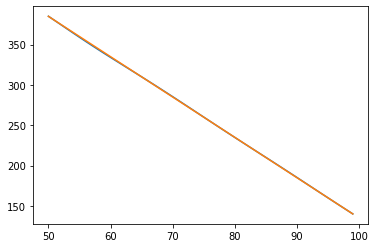

In [65]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [66]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

,Val Predictions,Actuals
0,180.194061,180
1,175.134888,175
2,170.073593,170
3,165.020309,165
4,159.983429,160
...,...,...
15995,4.050106,5
15996,0.049294,0
15997,653.284058,660
15998,629.751038,655


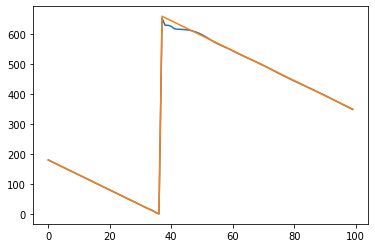

In [67]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [68]:
model2 = Sequential()
model2.add(InputLayer((5, 1)))
model2.add(Conv1D(64, kernel_size=2))
model2.add(Flatten())
model2.add(Dense(8, 'relu'))
model2.add(Dense(1, 'linear'))

model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 4, 64)             192       
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 8)                 2056      
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,257
Trainable params: 2,257
Non-trainable params: 0
_________________________________________________________________


In [69]:
cp2 = ModelCheckpoint('model2/', save_best_only=True)
model2.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [70]:
model2.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp2])

Epoch 1/10
1969/1969 [==============================] - 7s 3ms/step - loss: 5803.0298 - root_mean_squared_error: 76.1776 - val_loss: 3309.3743 - val_root_mean_squared_error: 57.5272
Epoch 2/10
1969/1969 [==============================] - 7s 3ms/step - loss: 3232.7581 - root_mean_squared_error: 56.8573 - val_loss: 3239.3608 - val_root_mean_squared_error: 56.9154
Epoch 3/10
1969/1969 [==============================] - 6s 3ms/step - loss: 3208.0586 - root_mean_squared_error: 56.6397 - val_loss: 3222.1875 - val_root_mean_squared_error: 56.7643
Epoch 4/10
1969/1969 [==============================] - 5s 3ms/step - loss: 3186.0872 - root_mean_squared_error: 56.4454 - val_loss: 3193.0415 - val_root_mean_squared_error: 56.5070
Epoch 5/10
1969/1969 [==============================] - 6s 3ms/step - loss: 3149.3594 - root_mean_squared_error: 56.1192 - val_loss: 3148.0791 - val_root_mean_squared_error: 56.1077
Epoch 6/10
1969/1969 [==============================] - 6s 3ms/step - loss: 3103.4053 - ro

In [71]:
model3 = Sequential()
model3.add(InputLayer((5, 1)))
model3.add(GRU(64))
model3.add(Dense(8, 'relu'))
model3.add(Dense(1, 'linear'))
model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 64)                12864     
                                                                 
 dense_8 (Dense)             (None, 8)                 520       
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 13,393
Trainable params: 13,393
Non-trainable params: 0
_________________________________________________________________


In [72]:
cp3 = ModelCheckpoint('model3/', save_best_only=True)
model3.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [73]:
model3.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=10, callbacks=[cp3])

Epoch 1/10
1969/1969 [==============================] - ETA: 0s - loss: 133484.3281 - root_mean_squared_error: 365.3551

1969/1969 [==============================] - 23s 10ms/step - loss: 133484.3281 - root_mean_squared_error: 365.3551 - val_loss: 119591.2734 - val_root_mean_squared_error: 345.8197
Epoch 2/10
1966/1969 [============================>.] - ETA: 0s - loss: 106491.1953 - root_mean_squared_error: 326.3299

1969/1969 [==============================] - 18s 9ms/step - loss: 106461.6953 - root_mean_squared_error: 326.2847 - val_loss: 92670.6562 - val_root_mean_squared_error: 304.4185
Epoch 3/10
1964/1969 [============================>.] - ETA: 0s - loss: 79602.8594 - root_mean_squared_error: 282.1398

1969/1969 [==============================] - 19s 10ms/step - loss: 79570.3516 - root_mean_squared_error: 282.0822 - val_loss: 66230.9766 - val_root_mean_squared_error: 257.3538
Epoch 4/10
1963/1969 [============================>.] - ETA: 0s - loss: 54175.3984 - root_mean_squared_error: 232.7561

1969/1969 [==============================] - 17s 9ms/step - loss: 54129.8906 - root_mean_squared_error: 232.6583 - val_loss: 42651.1094 - val_root_mean_squared_error: 206.5215
Epoch 5/10
1964/1969 [============================>.] - ETA: 0s - loss: 32658.3281 - root_mean_squared_error: 180.7162

1969/1969 [==============================] - 17s 9ms/step - loss: 32627.3125 - root_mean_squared_error: 180.6303 - val_loss: 23359.9277 - val_root_mean_squared_error: 152.8396
Epoch 6/10
1965/1969 [============================>.] - ETA: 0s - loss: 16271.2539 - root_mean_squared_error: 127.5588

1969/1969 [==============================] - 17s 8ms/step - loss: 16264.1553 - root_mean_squared_error: 127.5310 - val_loss: 10326.7998 - val_root_mean_squared_error: 101.6209
Epoch 7/10
1963/1969 [============================>.] - ETA: 0s - loss: 6511.1182 - root_mean_squared_error: 80.6915

1969/1969 [==============================] - 19s 9ms/step - loss: 6498.1631 - root_mean_squared_error: 80.6112 - val_loss: 3520.5610 - val_root_mean_squared_error: 59.3343
Epoch 8/10
1965/1969 [============================>.] - ETA: 0s - loss: 1918.4846 - root_mean_squared_error: 43.8005

1969/1969 [==============================] - 18s 9ms/step - loss: 1916.5706 - root_mean_squared_error: 43.7787 - val_loss: 803.3858 - val_root_mean_squared_error: 28.3441
Epoch 9/10
1967/1969 [============================>.] - ETA: 0s - loss: 355.7538 - root_mean_squared_error: 18.8614

1969/1969 [==============================] - 18s 9ms/step - loss: 355.5488 - root_mean_squared_error: 18.8560 - val_loss: 99.7255 - val_root_mean_squared_error: 9.9863
Epoch 10/10
1963/1969 [============================>.] - ETA: 0s - loss: 41.9800 - root_mean_squared_error: 6.4792

1969/1969 [==============================] - 17s 9ms/step - loss: 41.9041 - root_mean_squared_error: 6.4733 - val_loss: 19.0296 - val_root_mean_squared_error: 4.3623
